# Yield Prediction

This notebook builds a machine learning model to predict yield.

## 1. Import Required Libraries

In [58]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load and Explore Data
Load the crop yield dataset and examine its structure, statistics, and data quality.

In [59]:
data = pd.read_csv("../data/crop_yield.csv")
data.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


### Data Info

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


### Statistical Summary

In [61]:
data.describe(include='all')

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689,19689.000000,19689,19689,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
unique,55,NaN,6,30,NaN,NaN,NaN,NaN,NaN,NaN
top,Rice,NaN,Kharif,Karnataka,NaN,NaN,NaN,NaN,NaN,NaN
freq,1197,NaN,8232,1432,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2009.127584,NaN,NaN,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,NaN,6.498099,NaN,NaN,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,NaN,1997.000000,NaN,NaN,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,NaN,2004.000000,NaN,NaN,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,NaN,2010.000000,NaN,NaN,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,NaN,2015.000000,NaN,NaN,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889


## 3. Data Preprocessing
Clean and prepare the data by handling whitespace, checking for missing values, and encoding categorical variables.

In [62]:
# Remove leading/trailing whitespace from all object columns to prevent duplicate entries
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].str.strip()

In [63]:
# Check for missing values and duplicate rows to ensure data quality
print("Missing values in each column:\n", data.isnull().sum())
print("Duplicate rows:", data.duplicated().sum())

Missing values in each column:
 Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64
Duplicate rows: 0


### Feature Cardinality

In [64]:
# Count unique values for each column to understand feature cardinality
data.nunique()

Crop                  55
Crop_Year             24
Season                 6
State                 30
Area               13644
Production         14016
Annual_Rainfall      634
Fertilizer         18598
Pesticide          17405
Yield              13551
dtype: int64

### Correlation Analysis

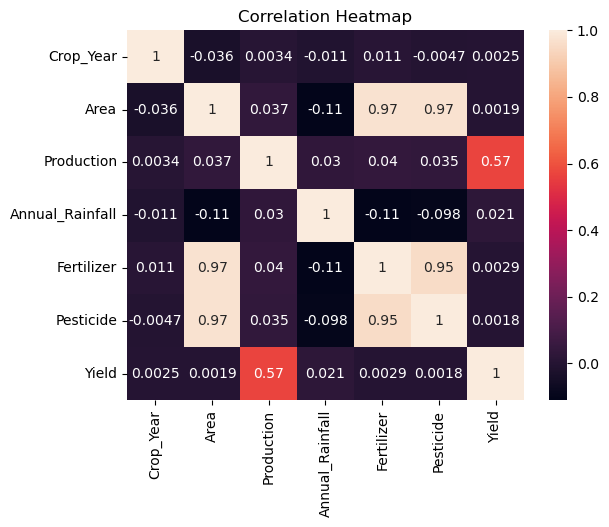

In [65]:
# Create a heatmap to visualize correlations between numerical features and target variable
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

### Label Encoding

In [ ]:
# Label encoding for categorical variables

Le_crop = LabelEncoder()
data['Crop'] = Le_crop.fit_transform(data['Crop'])

Le_season = LabelEncoder()
data['Season'] = Le_season.fit_transform(data['Season'])

Le_state = LabelEncoder()
data['State'] = Le_state.fit_transform(data['State'])

### Train-Test Split

In [46]:
# Spliting the data into features and target variable

X = data.drop('Yield', axis=1)
y = data['Yield']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of split data:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# here 20% of the data should be used for testing, and the remaining 80% is used for training

Shape of split data:
X_train shape: (15751, 9)
y_train shape: (15751,)
X_test shape: (3938, 9)
y_test shape: (3938,)


## 4. Model Training
Train a Random Forest Regressor model with optimized hyperparameters to predict crop yield.

In [66]:
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)
print("\nModel Trained Successfully")



Model Trained Successfully


### Generate Predictions

In [48]:
# Generate predictions on the test set
y_pred = model.predict(X_test)

## 5. Model Evaluation
Evaluate model performance using regression metrics (MAE, RMSE, R² score).

In [49]:
# Calculate regression performance metrics
# MAE: Average magnitude of errors (in yield units)
# RMSE: Root Mean Squared Error (penalizes larger errors more heavily)
# R²: Coefficient of determination (proportion of variance explained)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 11.172575158537807
RMSE: 203.69079034404692
R2 Score: 0.9482178310289926


## 6. Visualization
Visualize model predictions vs actual values and feature importance.

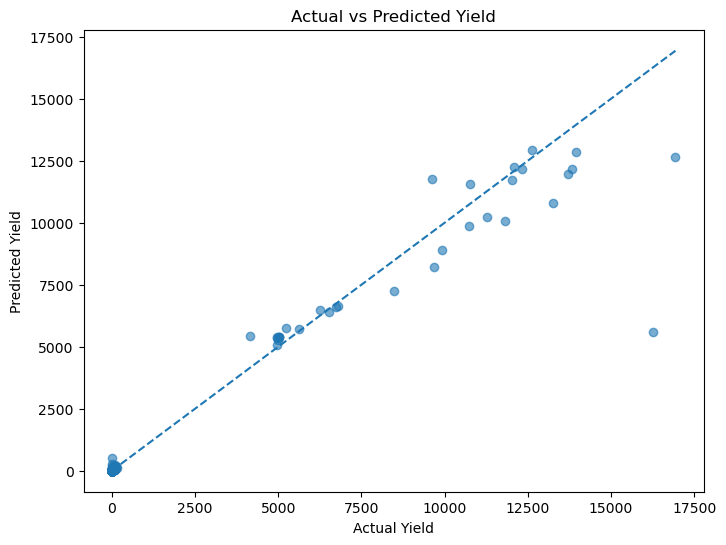

In [50]:
# Create scatter plot comparing actual vs predicted yield values
# Points close to the diagonal line indicate good predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--')   # Perfect prediction line

plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield")
plt.show()

Production         0.619493
Crop               0.192133
State              0.041591
Area               0.041512
Fertilizer         0.028843
Pesticide          0.027342
Season             0.023724
Annual_Rainfall    0.018230
Crop_Year          0.007133
dtype: float64


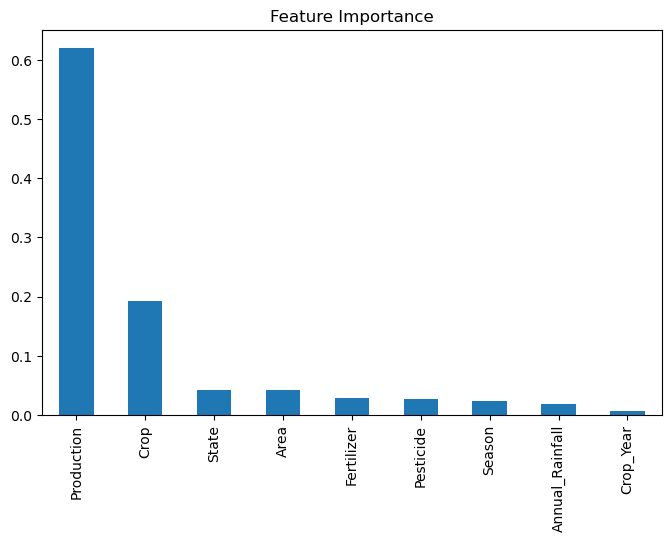

In [51]:
import pandas as pd

# Extract feature importances from the trained model
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False, inplace=True)
print(importance)

# Visualize feature importance in a bar chart
importance.plot(kind='bar', figsize=(8,5), title="Feature Importance")
plt.show()

## 7. Test Prediction
Make predictions on new data to demonstrate model inference.

In [52]:
# Example: Prepare new data for prediction
new_data = pd.DataFrame({
    "Crop": ["Coconut"],
    "Crop_Year": [2023],
    "Season": ["Whole Year"],
    "State": ["Assam"],
    "Area": [19656],
    "Production": [126905000],
    "Annual_Rainfall": [2051.4],
    "Fertilizer": [1870661.52],
    "Pesticide": [6093.36]
})

# Apply the same label encoding transformations used during training
new_data["State"] = Le_state.transform(new_data["State"])
new_data["Crop"] = Le_crop.transform(new_data["Crop"])
new_data["Season"] = Le_season.transform(new_data["Season"])

# Ensure column order matches training data
new_data = new_data.reindex(columns=X.columns)

# Make prediction using the trained Random Forest model
prediction = model.predict(new_data)

print("Predicted Yield:", prediction[0])

Predicted Yield: 6108.476827980856


In [53]:
# For regression models, R² score is the appropriate accuracy metric
# (Note: accuracy_score is for classification models, not regression)
accuracy = r2_score(y_test, y_pred)
print("Accuracy (R² Score):", accuracy)

Accuracy (R² Score): 0.9482178310289926


## 8. Save Model
Save the trained model and label encoders for future use.

In [54]:
import joblib

# Save the trained model and label encoders for future inference
joblib.dump(model, '../models/yield_prediction_model.pkl')
joblib.dump(Le_crop, '../models/le_crop_yield.pkl')
joblib.dump(Le_season, '../models/le_season_yield.pkl')
joblib.dump(Le_state, '../models/le_state_yield.pkl')

print("Model and label encoders saved successfully!")

Model and label encoders saved successfully!
